In [1]:
import numpy as np
import pandas as pd 
import mplfinance as mpf
df = pd.read_csv("C:/Users/Kazem Kamrani/Desktop/TehranMarket/Symbol/ShakhesKol.csv", index_col = "Date",
                 parse_dates = True,
                 na_values=['nan'])
#df = df.drop(df.index[-1])
df

,Open,High,Low,Close,Volume
Date,,,,,
1992-06-29,484.90,484.90,484.90,484.90,92291
1992-06-30,484.30,484.30,484.30,484.30,194221
1992-07-01,484.30,484.30,484.30,484.30,67254
1992-07-04,484.34,484.34,484.34,484.34,113238
1992-07-05,484.34,484.34,484.34,484.34,40488
...,...,...,...,...,...
2023-07-29,2000469.79,2002843.37,1996753.00,1996755.92,4087515263
2023-07-30,1995623.46,1995623.46,1967667.05,1967667.47,6759262471
2023-07-31,1968605.33,1973916.78,1968605.33,1973910.17,4699158214


In [2]:
def calculate_ATR(data, period=14):
    # Calculate True Range (TR)
    data['High-Low'] = data['High'] - data['Low']
    data['High-PrevClose'] = abs(data['High'] - data['Close'].shift())
    data['Low-PrevClose'] = abs(data['Low'] - data['Close'].shift())
    data['TrueRange'] = data[['High-Low', 'High-PrevClose', 'Low-PrevClose']].max(axis=1)
    
    # Calculate Average True Range (ATR)
    data['ATR'] = data['TrueRange'].rolling(period).mean()
    
    # Clean up temporary columns
    data.drop(['High-Low', 'High-PrevClose', 'Low-PrevClose', 'TrueRange'], axis=1, inplace=True)
    
    return data
dfATR = calculate_ATR(df, period=14)
dfATR.tail()

,Open,High,Low,Close,Volume,ATR
Date,,,,,,
2023-07-29,2000469.79,2002843.37,1996753.00,1996755.92,4087515263,27575.229286
2023-07-30,1995623.46,1995623.46,1967667.05,1967667.47,6759262471,28379.180714
2023-07-31,1968605.33,1973916.78,1968605.33,1973910.17,4699158214,26671.213571
2023-08-01,1974597.06,1993670.33,1974597.06,1993659.21,4302476203,24013.072857
2023-08-05,1996927.02,2033048.43,1996927.02,2033048.34,6030234242,26059.160714


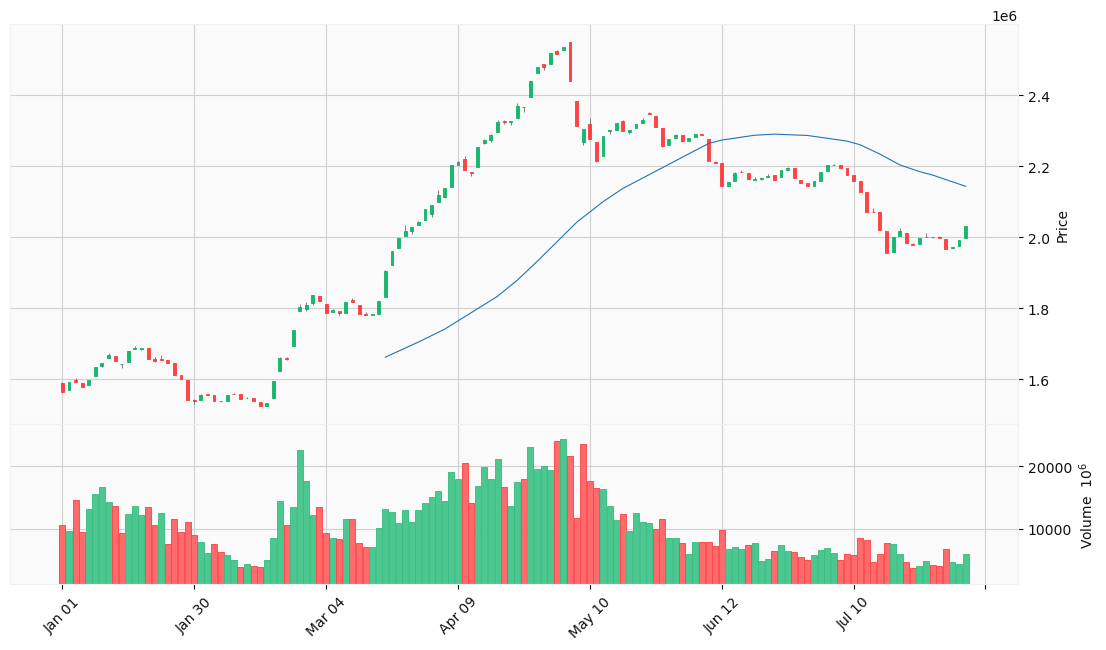

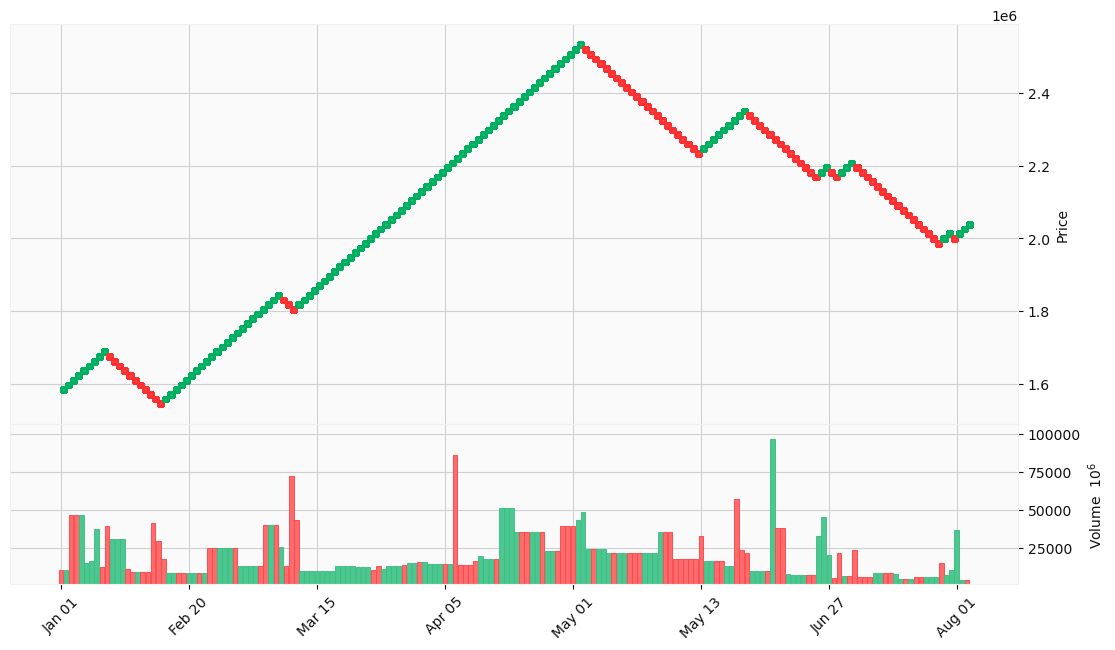

In [4]:
Ndf = df.loc['2023-01-01':]
mpf.plot(Ndf,type="candle", volume = True, style = 'yahoo',mav=50, figsize=(14,8))
mpf.plot(Ndf,type="renko", volume = True, style = 'yahoo' , renko_params = dict(brick_size =13000) , 
        figsize=(14,8))